<a href="https://colab.research.google.com/github/Tiagoeem/Intro_Ciencia_Dados_2021/blob/main/Olist_Fundamentos_2021_1_emSala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gitly

In [ ]:
# Instalando Pandas profiling
!pip install -U pandas-profiling

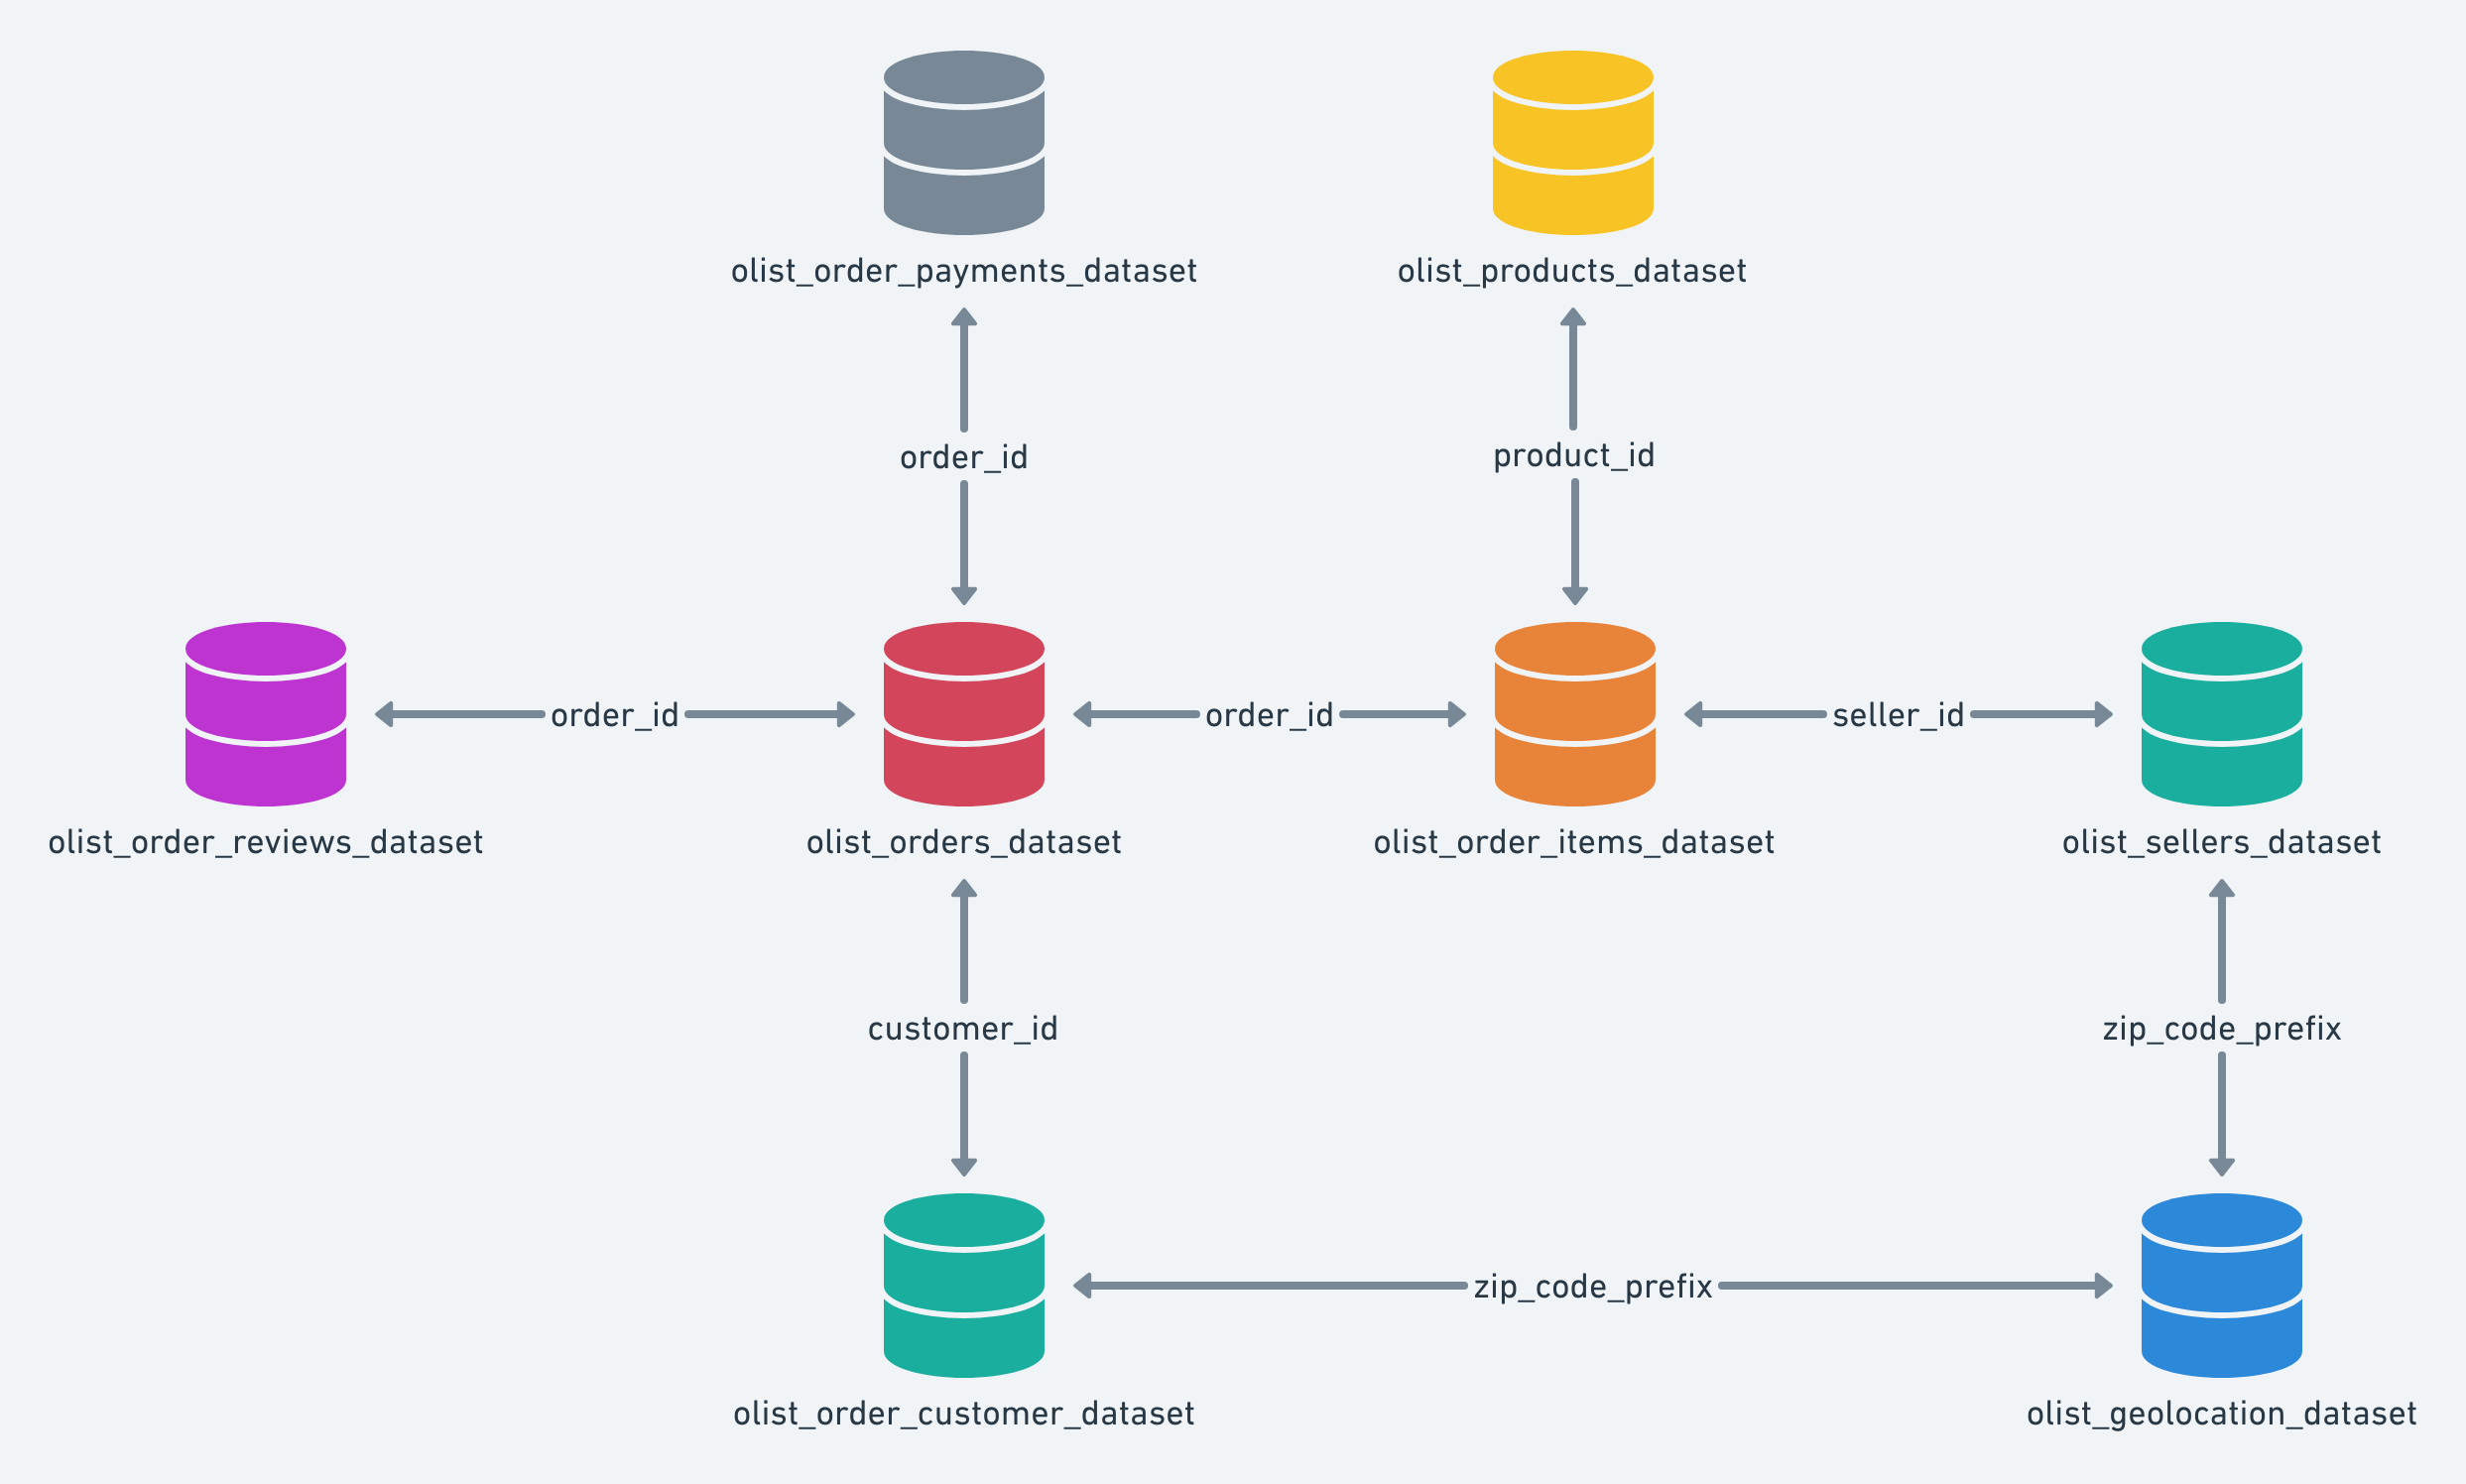

In [4]:
from gitly.colab.plot import GitlyPlotter

gitly = GitlyPlotter('github')

# Carregamento de arquivos

In [5]:
import pandas as pd

path_dir = '/content/drive/MyDrive/Colab Notebooks/datasets/e-commerce/dificil/OLIST'

df_customers = pd.read_csv( path_dir + '/olist_customers_dataset.csv')
df_geo = pd.read_csv(path_dir + '/olist_geolocation_dataset.csv', encoding='utf8')
df_order_items = pd.read_csv(path_dir + '/olist_order_items_dataset.csv')
df_order_pay = pd.read_csv(path_dir + '/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv(path_dir + '/olist_order_reviews_dataset.csv')
df_order = pd.read_csv(path_dir + '/olist_orders_dataset.csv')
df_products = pd.read_csv(path_dir + '/olist_products_dataset.csv')
df_sellers = pd.read_csv(path_dir + '/olist_sellers_dataset.csv')

In [6]:
df_customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [7]:
df_geo.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


In [8]:
df_order.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [9]:
df_order_pay.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [10]:
df_order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [11]:
df_products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [12]:
df_sellers.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [13]:
df_reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


# Exploração e Análise

## Payment (EDA)

Pandas Profiling

In [14]:
df_order_pay.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [15]:
df_order_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [16]:
df_order_pay.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [17]:
df_order_pay.corr()

,payment_sequential,payment_installments,payment_value
payment_sequential,1.000000,-0.086363,-0.069593
payment_installments,-0.086363,1.000000,0.330811
payment_value,-0.069593,0.330811,1.000000


In [18]:
df_order_pay.payment_type.unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

## EDA usando Pandas Profiling

In [19]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df_order_pay)
profile.to_file("your_report.html")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Order

In [20]:
df_order.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [21]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


### * Trabalhando com Datetime

In [22]:
# type: object
df_order.iloc[0].order_estimated_delivery_date

'2017-10-18 00:00:00'

In [23]:
# type: object
df_order.iloc[0].order_delivered_customer_date

'2017-10-10 21:25:13'

**Conversão para Datetime**

In [24]:
df_order.order_purchase_timestamp = pd.to_datetime( df_order.order_purchase_timestamp, format='%Y-%m-%d' )
df_order.order_approved_at = pd.to_datetime( df_order.order_approved_at, format='%Y-%m-%d' )
df_order.order_delivered_carrier_date = pd.to_datetime( df_order.order_delivered_carrier_date, format='%Y-%m-%d' )
df_order.order_delivered_customer_date = pd.to_datetime( df_order.order_delivered_customer_date, format='%Y-%m-%d' )
df_order.order_estimated_delivery_date = pd.to_datetime( df_order.order_estimated_delivery_date, format='%Y-%m-%d' )

In [25]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [26]:
df_order.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


In [27]:
# Datetime
df_order.iloc[0].order_estimated_delivery_date

Timestamp('2017-10-18 00:00:00')

In [28]:
# Datetime
df_order.iloc[0].order_delivered_customer_date

Timestamp('2017-10-10 21:25:13')

In [29]:
df_order.iloc[0].order_estimated_delivery_date - df_order.iloc[0].order_delivered_customer_date

Timedelta('7 days 02:34:47')

In [30]:
df_order.iloc[0].order_estimated_delivery_date > df_order.iloc[0].order_delivered_customer_date

True

### Qual a procentagem de atraso?

In [31]:
df_order['no_prazo'] = df_order.order_estimated_delivery_date > df_order.order_delivered_customer_date
df_order['no_prazo'].head(3)

0    True
1    True
2    True
Name: no_prazo, dtype: bool

In [32]:
df_order.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,no_prazo
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,True
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,True
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,True


In [33]:
# Conta a quantidade de ocorrencias de cada valor em uma coluna e ordena!
df_order.no_prazo.value_counts()

True     88649
False    10792
Name: no_prazo, dtype: int64

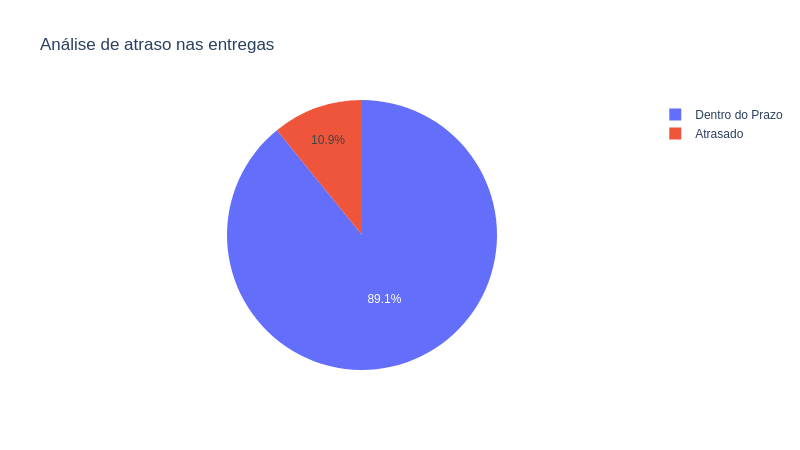

In [80]:
import plotly.express as px

data = df_order.no_prazo.value_counts()
fig = px.pie(data, values='no_prazo', names=['Dentro do Prazo', 'Atrasado'], title='Análise de atraso nas entregas')
gitly.show( fig )

## Qual a distribuição de compras durante a semana?

In [81]:
df_order['dia_semana'] = df_order.order_purchase_timestamp.dt.day_name()
df_order.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,no_prazo,dia_semana,dia_mes,zona_salario
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,True,Monday,2,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,True,Tuesday,24,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,True,Wednesday,8,False


In [82]:
df_order.dia_semana.value_counts()

Monday       16196
Tuesday      15963
Wednesday    15552
Thursday     14761
Friday       14122
Sunday       11960
Saturday     10887
Name: dia_semana, dtype: int64

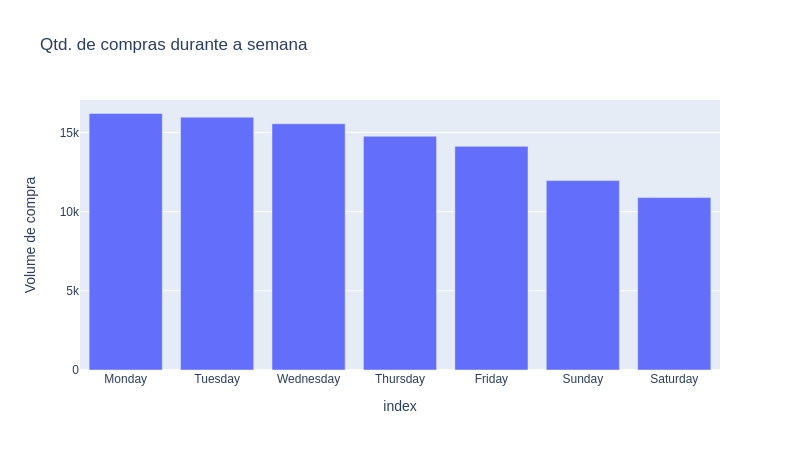

In [83]:
data = df_order.dia_semana.value_counts()
fig = px.bar(data, x=data.index, y='dia_semana', title='Qtd. de compras durante a semana',
                labels={'dia_semana':'Volume de compra', 'x':'Dia'})
gitly.show( fig )

In [84]:
df_order['dia_mes'] = df_order.order_purchase_timestamp.dt.day
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,no_prazo,dia_semana,dia_mes,zona_salario
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,True,Monday,2,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,True,Tuesday,24,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,True,Wednesday,8,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,True,Saturday,18,False
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,True,Tuesday,13,False


# Qtd ed compras pelo dia do mês

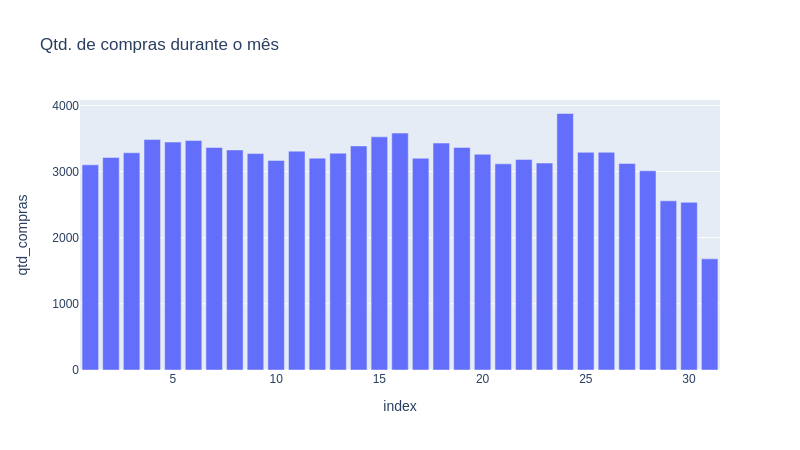

In [85]:
data = df_order.dia_mes.value_counts().rename('qtd_compras').reset_index().sort_values(by='index')

fig = px.bar(data, x='index', y='qtd_compras', title='Qtd. de compras durante o mês',
                labels={'dia_semana':'Volume de compra', 'x':'Dia'})
gitly.show( fig )

## Zona de pagamento 30 ao dia 7

In [86]:
def verifica_zona_salario ( dia ):
    zona_s = [1,5,15,30,31]

    return dia in zona_s

df_order['zona_salario'] = df_order.dia_mes.apply( verifica_zona_salario )

In [87]:
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,no_prazo,dia_semana,dia_mes,zona_salario
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,True,Monday,2,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,True,Tuesday,24,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,True,Wednesday,8,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,True,Saturday,18,False
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,True,Tuesday,13,False


In [88]:
df_order.groupby(by=['dia_semana', 'zona_salario']).count()

order_id  customer_id  ...  no_prazo  dia_mes
dia_semana zona_salario                         ...                   
Friday     False            12325        12325  ...     12325    12325
           True              1797         1797  ...      1797     1797
Monday     False            13979        13979  ...     13979    13979
           True              2217         2217  ...      2217     2217
Saturday   False             9779         9779  ...      9779     9779
           True              1108         1108  ...      1108     1108
Sunday     False            10126        10126  ...     10126    10126
           True              1834         1834  ...      1834     1834
Thursday   False            12186        12186  ...     12186    12186
           True              2575         2575  ...      2575     2575
Tuesday    False            13442        13442  ...     13442    13442
           True              2521         2521  ...      2521     2521
Wednesday  False            13320        13320  ...     13320    13320
           True              2232         2232  ...      2232     2232

[14 rows x 10 columns]

In [89]:
df_order.groupby(by=['dia_semana', 'zona_salario']).count()['order_id']

dia_semana  zona_salario
Friday      False           12325
            True             1797
Monday      False           13979
            True             2217
Saturday    False            9779
            True             1108
Sunday      False           10126
            True             1834
Thursday    False           12186
            True             2575
Tuesday     False           13442
            True             2521
Wednesday   False           13320
            True             2232
Name: order_id, dtype: int64

In [90]:
df_order.groupby(by=['dia_semana', 'zona_salario']).count()['order_id'].rename('qtd_compras')

dia_semana  zona_salario
Friday      False           12325
            True             1797
Monday      False           13979
            True             2217
Saturday    False            9779
            True             1108
Sunday      False           10126
            True             1834
Thursday    False           12186
            True             2575
Tuesday     False           13442
            True             2521
Wednesday   False           13320
            True             2232
Name: qtd_compras, dtype: int64

In [91]:
df_order.groupby(by=['dia_semana', 'zona_salario']).count()['order_id'].rename('qtd_compras').reset_index()

,dia_semana,zona_salario,qtd_compras
0,Friday,False,12325
1,Friday,True,1797
2,Monday,False,13979
3,Monday,True,2217
4,Saturday,False,9779
5,Saturday,True,1108
6,Sunday,False,10126
7,Sunday,True,1834
8,Thursday,False,12186
9,Thursday,True,2575


In [92]:
data = df_order.groupby(by=['dia_semana', 'zona_salario']).count()['order_id'].rename('qtd_compras').reset_index()
#data['zona_str'] = data.zona_salario.apply(str.to_string)
data['zona'] = data.zona_salario.astype('str')
data.head().info

<bound method DataFrame.info of   dia_semana  zona_salario  qtd_compras   zona
0     Friday         False        12325  False
1     Friday          True         1797   True
2     Monday         False        13979  False
3     Monday          True         2217   True
4   Saturday         False         9779  False>

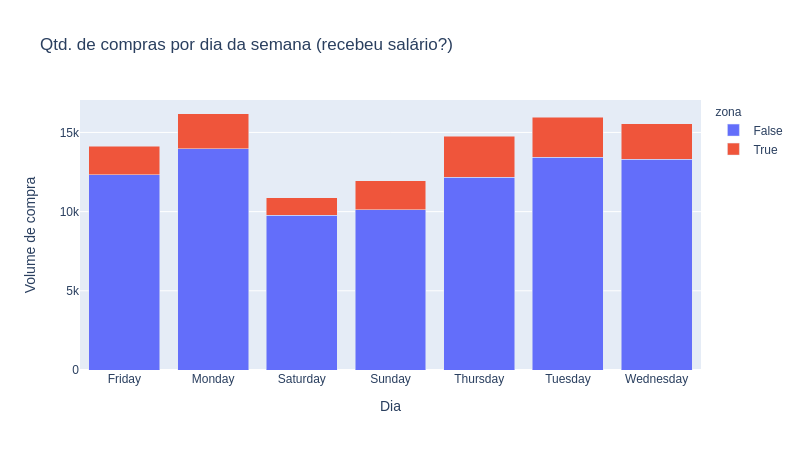

In [93]:
fig = px.bar(data, x='dia_semana', y='qtd_compras', color='zona', title="Qtd. de compras por dia da semana (recebeu salário?)",
             barmode = 'stack', labels={'qtd_compras':'Volume de compra', 'dia_semana':'Dia','zona=False':'Normal'})
gitly.show( fig )

## Qual o horário com maior volume de compras durante o dia?

In [94]:
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,no_prazo,dia_semana,dia_mes,zona_salario
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,True,Monday,2,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,True,Tuesday,24,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,True,Wednesday,8,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,True,Saturday,18,False
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,True,Tuesday,13,False


In [95]:
df_volume_hora = df_order.order_purchase_timestamp.dt.hour.value_counts().rename('volume_hora').reset_index()
df_volume_hora

,index,volume_hora
0,16,6675
1,11,6578
2,14,6569
3,13,6518
4,15,6454
5,21,6217
6,20,6193
7,10,6177
8,17,6150
9,12,5995


In [96]:
df_volume_hora.sort_values(by='index', ascending=True)

,index,volume_hora
16,0,2394
18,1,1170
19,2,510
21,3,272
22,4,206
23,5,188
20,6,502
17,7,1231
15,8,2967
13,9,4785


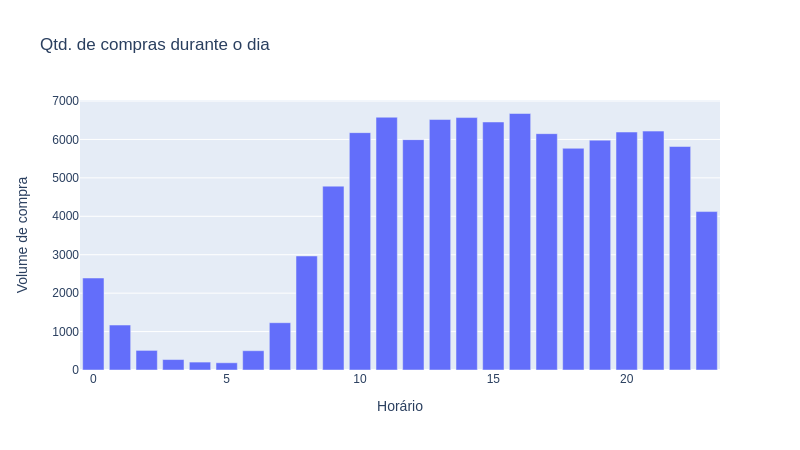

In [97]:
data = df_volume_hora.sort_values(by='index', ascending=True)
fig = px.bar(data, x='index', y='volume_hora', title='Qtd. de compras durante o dia',
                labels={'volume_hora':'Volume de compra', 'index':'Horário'})
gitly.show( fig )

## Entrega durante o dia?

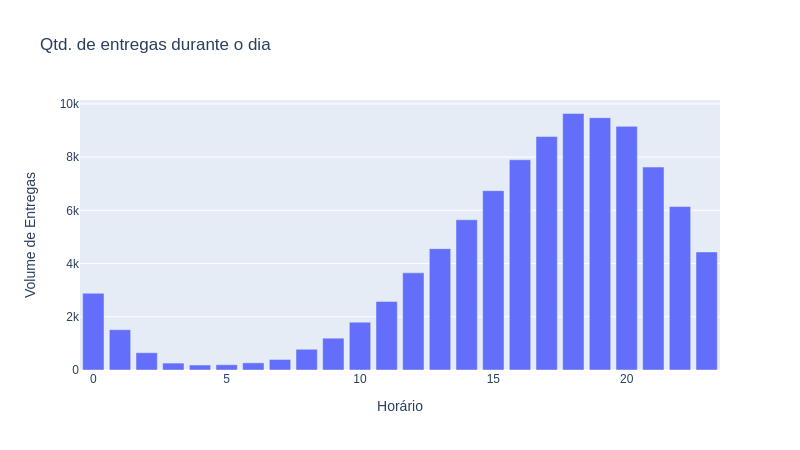

In [98]:
df_volume_hora = df_order.order_delivered_customer_date.dt.hour.value_counts().rename('volume_hora').reset_index()
data = df_volume_hora.sort_values(by='index', ascending=True)
fig = px.bar(data, x='index', y='volume_hora', title='Qtd. de entregas durante o dia',
                labels={'volume_hora':'Volume de Entregas', 'index':'Horário'})
gitly.show( fig )

## Prodututos aos entregadores

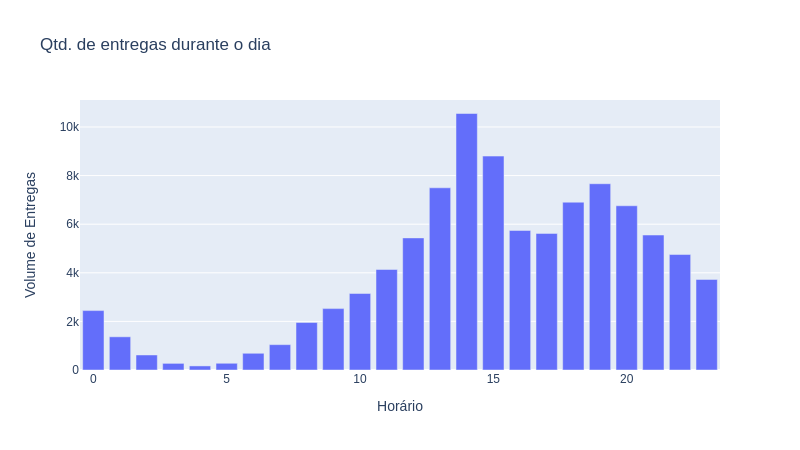

In [99]:
df_volume_hora = df_order.order_delivered_carrier_date.dt.hour.value_counts().rename('volume_hora').reset_index()
data = df_volume_hora.sort_values(by='index', ascending=True)
fig = px.bar(data, x='index', y='volume_hora', title='Qtd. de entregas durante o dia',
                labels={'volume_hora':'Volume de Entregas', 'index':'Horário'})
gitly.show( fig )

# Merge

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

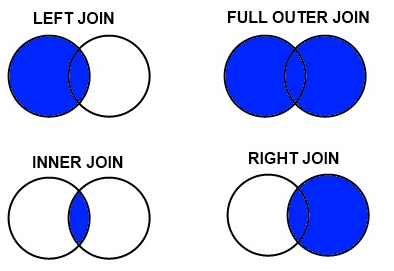

## Quais as categorias mais vendidas?

In [100]:
df_order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [101]:
df_products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [102]:
df_prod_cat = pd.merge(df_order_items[['product_id', 'price','freight_value']], df_products[['product_id','product_category_name']], how='inner', on='product_id')
df_prod_cat.head()

,product_id,price,freight_value,product_category_name
0,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,cool_stuff
1,4244733e06e7ecb4970a6e2683c13e61,55.9,17.96,cool_stuff
2,4244733e06e7ecb4970a6e2683c13e61,64.9,18.33,cool_stuff
3,4244733e06e7ecb4970a6e2683c13e61,58.9,16.17,cool_stuff
4,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,cool_stuff


In [103]:
df_prod_cat.product_category_name.value_counts().head(7)

cama_mesa_banho           11115
beleza_saude               9670
esporte_lazer              8641
moveis_decoracao           8334
informatica_acessorios     7827
utilidades_domesticas      6964
relogios_presentes         5991
Name: product_category_name, dtype: int64

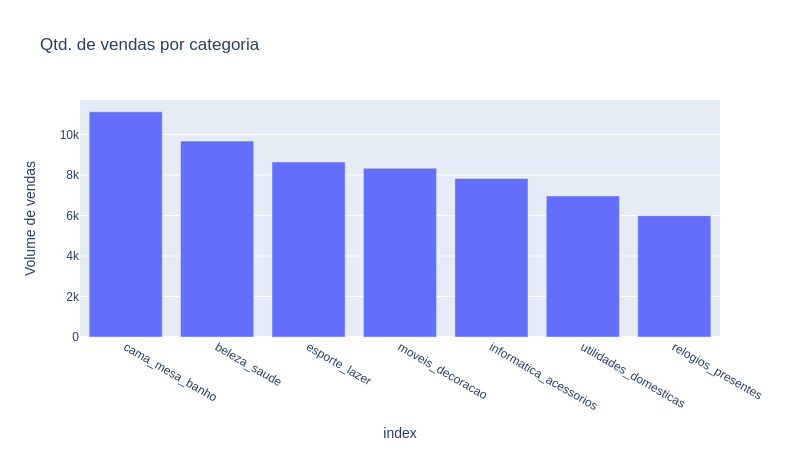

In [104]:
data = df_prod_cat.product_category_name.value_counts().head(7)
fig = px.bar(data, x=data.index, y='product_category_name', title='Qtd. de vendas por categoria',
                labels={'product_category_name':'Volume de vendas', 'x':'Categoria'})
gitly.show( fig )

## Qual é a categoria que mais fatura?

In [105]:
df_prod_cat.head()

,product_id,price,freight_value,product_category_name
0,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,cool_stuff
1,4244733e06e7ecb4970a6e2683c13e61,55.9,17.96,cool_stuff
2,4244733e06e7ecb4970a6e2683c13e61,64.9,18.33,cool_stuff
3,4244733e06e7ecb4970a6e2683c13e61,58.9,16.17,cool_stuff
4,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,cool_stuff


In [106]:
df_prod_cat.groupby(by='product_category_name').sum().sort_values(by='price', ascending=False).head(7)

,price,freight_value
product_category_name,,
beleza_saude,1258681.34,182566.73
relogios_presentes,1205005.68,100535.93
cama_mesa_banho,1036988.68,204693.04
esporte_lazer,988048.97,168607.51
informatica_acessorios,911954.32,147318.08
moveis_decoracao,729762.49,172749.30
cool_stuff,635290.85,84039.10


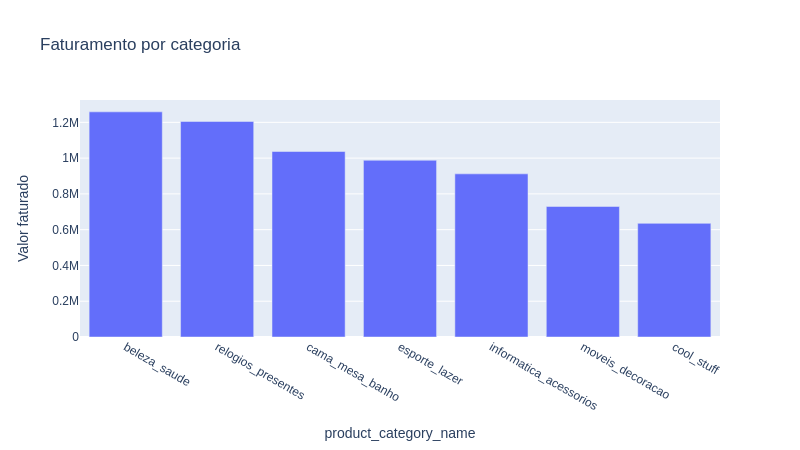

In [107]:
data = df_prod_cat.groupby(by='product_category_name').sum().sort_values(by='price', ascending=False).head(7)
fig = px.bar(data, x=data.index, y='price', title='Faturamento por categoria',
                labels={'price':'Valor faturado', 'x':'Categoria'})
gitly.show( fig )

## Qual a categoria mais cara? (em média)

In [108]:
df_prod_cat.groupby(by='product_category_name').mean().sort_values(by='price', ascending=False).head(7)

,price,freight_value
product_category_name,,
pcs,1098.340542,48.454680
portateis_casa_forno_e_cafe,624.285658,36.156053
eletrodomesticos_2,476.124958,44.538571
agro_industria_e_comercio,342.124858,27.564151
instrumentos_musicais,281.616000,27.409544
eletroportateis,280.778468,23.593888
portateis_cozinha_e_preparadores_de_alimentos,264.568667,20.650667


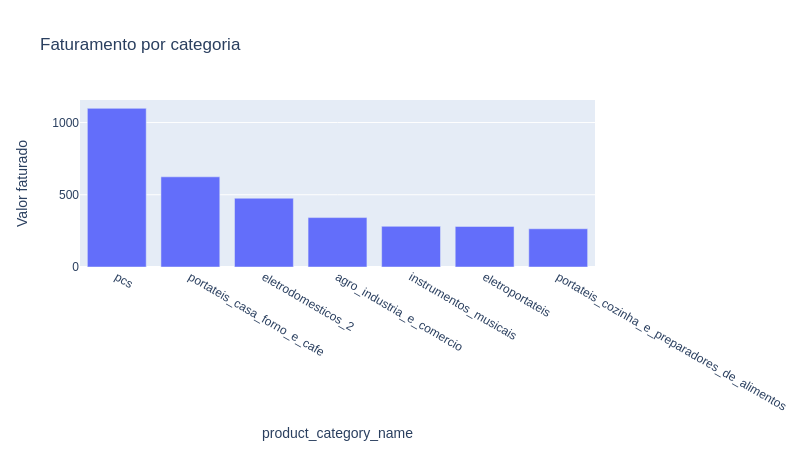

In [109]:
data = df_prod_cat.groupby(by='product_category_name').mean().sort_values(by='price', ascending=False).head(7)
fig = px.bar(data, x=data.index, y='price', title='Faturamento por categoria',
                labels={'price':'Valor faturado', 'x':'Categoria'})
gitly.show( fig )

# Mapear os Haters

In [110]:
df_order.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,no_prazo,dia_semana,dia_mes,zona_salario
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,True,Monday,2,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,True,Tuesday,24,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,True,Wednesday,8,False


In [111]:
df_reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [112]:
df_customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [113]:
df_rev_order = pd.merge( df_reviews[['order_id', 'review_score']], df_order[['order_id', 'customer_id']], how='inner')
df_rev_order.head(3)

,order_id,review_score,customer_id
0,73fc7af87114b39712e6da79b0a377eb,4,41dcb106f807e993532d446263290104
1,a548910a1c6147796b98fdf73dbeba33,5,8a2e7ef9053dea531e4dc76bd6d853e6
2,f9e4b658b201a9f2ecdecbb34bed034b,5,e226dfed6544df5b7b87a48208690feb


In [114]:
df_avaliacoes = pd.merge( df_rev_order, df_customers[['customer_id', 'customer_city', 'customer_state']], how='inner' )
df_avaliacoes.head()

,order_id,review_score,customer_id,customer_city,customer_state
0,73fc7af87114b39712e6da79b0a377eb,4,41dcb106f807e993532d446263290104,osasco,SP
1,a548910a1c6147796b98fdf73dbeba33,5,8a2e7ef9053dea531e4dc76bd6d853e6,nova odessa,SP
2,f9e4b658b201a9f2ecdecbb34bed034b,5,e226dfed6544df5b7b87a48208690feb,santo antonio de jesus,BA
3,658677c97b385a9be170737859d3511b,5,de6dff97e5f1ba84a3cd9a3bc97df5f6,gravatal,SC
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,5986b333ca0d44534a156a52a8e33a83,curitibanos,SC


In [115]:
df_haters = df_avaliacoes.groupby(by=['customer_state']).mean().sort_values(by='review_score', ascending=False)
df_haters

,review_score
customer_state,
AP,4.176471
PR,4.167654
SP,4.160579
AM,4.154362
RS,4.125658
MG,4.121049
MS,4.115702
TO,4.100000
MT,4.087912


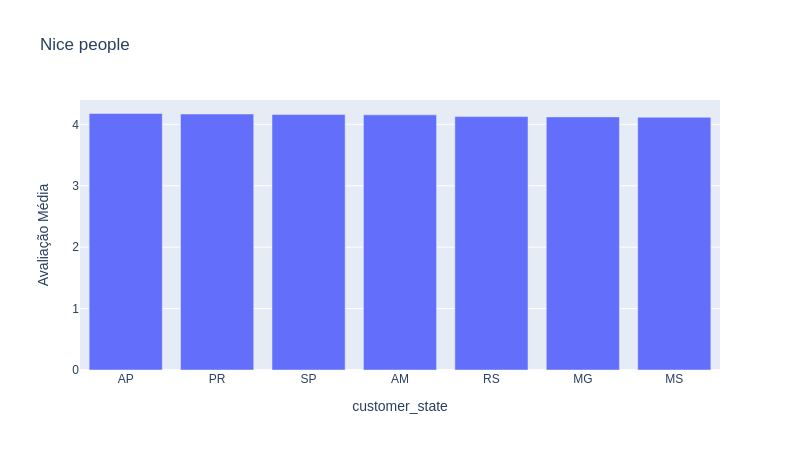

In [116]:
data = df_haters.head(7)
fig = px.bar(data, x=data.index, y='review_score', title='Nice people',
                labels={'review_score':'Avaliação Média', 'x':'Estado'})
gitly.show( fig )

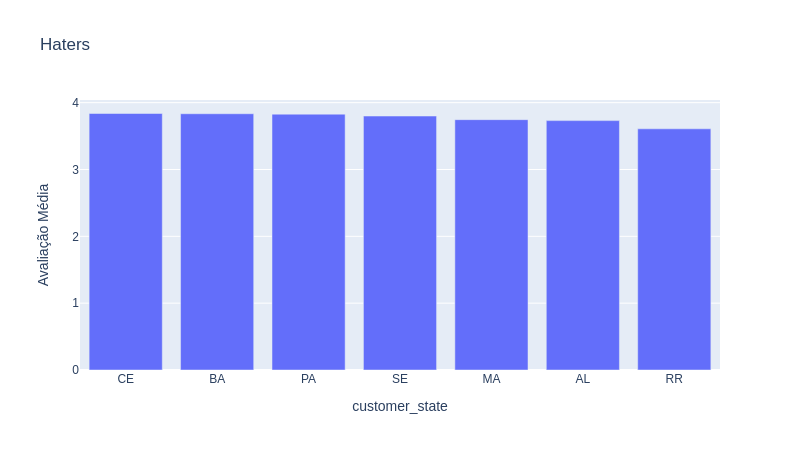

In [117]:
data = df_haters.tail(7)
fig = px.bar(data, x=data.index, y='review_score', title='Haters',
                labels={'review_score':'Avaliação Média', 'x':'Estado'})
gitly.show( fig )

# True Hater

In [118]:
df_avaliacoes.head(3)

,order_id,review_score,customer_id,customer_city,customer_state
0,73fc7af87114b39712e6da79b0a377eb,4,41dcb106f807e993532d446263290104,osasco,SP
1,a548910a1c6147796b98fdf73dbeba33,5,8a2e7ef9053dea531e4dc76bd6d853e6,nova odessa,SP
2,f9e4b658b201a9f2ecdecbb34bed034b,5,e226dfed6544df5b7b87a48208690feb,santo antonio de jesus,BA


In [119]:
df_qtd_ava = df_avaliacoes.customer_state.value_counts().rename('qtd_avaliacoes')
df_qtd_ava

SP    41967
RJ    12930
MG    11706
RS     5507
PR     5064
SC     3651
BA     3398
DF     2160
ES     2043
GO     2037
PE     1665
CE     1339
PA      982
MT      910
MA      751
MS      726
PB      537
PI      496
RN      487
AL      417
SE      350
TO      280
RO      253
AM      149
AC       81
AP       68
RR       46
Name: qtd_avaliacoes, dtype: int64

In [120]:
df_avaliacoes.query('review_score <= 2')

,order_id,review_score,customer_id,customer_city,customer_state
5,b18dcdf73be66366873cd26c5724d1dc,1,eecafc3ff695f031bfe354a9fff9d437,sao paulo,SP
16,0dacf04c5ad59fd5a0cc1faa07c34e39,2,db13a417a95ad304e9674468c17ade85,paty do alferes,RJ
19,583174fbe37d3d5f0d6661be3aad1786,1,e545e697bb9d1b81e0a702121d4e94d5,guarulhos,SP
29,0ce9a24111d850192a933fcaab6fbad3,1,5bb8de60ca2ca8b01a5ce471802fe10b,rio de janeiro,RJ
33,68e55ca79d04a79f20d4bfc0146f4b66,1,30e6e854c81fa16f46a5d7f3ab025e6f,esteio,RS
...,...,...,...,...,...
99960,54e6829fe81bc86cf88b12e6d07ea298,1,73b659d3fa440f212dde93bf1cba93b1,mairipora,SP
99975,f2d12dd37eaef72ed7b1186b2edefbcd,2,75b5d720874f58a6f6e2863e378c8575,sao paulo,SP
99978,18ed848509774f56cc8c1c0a1903ad7f,2,8f89d962f49f0d7a6d354a4ef3d099c2,maua,SP
99998,f8bd3f2000c28c5342fedeb5e50f2e75,1,8df587ce8a11ee97b3de9ef3405245c2,sorocaba,SP


In [121]:
df_qtd_haters = df_avaliacoes.query('review_score <= 2').customer_state.value_counts().rename('qtd_haters')
df_qtd_haters

SP    5443
RJ    2750
MG    1603
RS     746
BA     667
PR     649
SC     552
DF     330
ES     322
GO     311
PE     285
CE     271
PA     198
MA     167
MT     129
MS     105
AL     102
PI      93
PB      91
SE      77
RN      73
RO      39
TO      38
AM      23
AC      13
RR      11
AP       5
Name: qtd_haters, dtype: int64

In [122]:
df_true_haters = pd.merge( df_qtd_ava, df_qtd_haters, left_index=True, right_index=True )
df_true_haters

,qtd_avaliacoes,qtd_haters
SP,41967,5443
RJ,12930,2750
MG,11706,1603
RS,5507,746
PR,5064,649
SC,3651,552
BA,3398,667
DF,2160,330
ES,2043,322
GO,2037,311


In [123]:
df_true_haters['hater_ratio'] = df_true_haters.qtd_haters / df_true_haters.qtd_avaliacoes
df_true_haters

,qtd_avaliacoes,qtd_haters,hater_ratio
SP,41967,5443,0.129697
RJ,12930,2750,0.212684
MG,11706,1603,0.136938
RS,5507,746,0.135464
PR,5064,649,0.128160
SC,3651,552,0.151191
BA,3398,667,0.196292
DF,2160,330,0.152778
ES,2043,322,0.157611
GO,2037,311,0.152676


In [124]:
df_true_haters.sort_values(by='hater_ratio', ascending=False)

,qtd_avaliacoes,qtd_haters,hater_ratio
AL,417,102,0.244604
RR,46,11,0.239130
MA,751,167,0.222370
SE,350,77,0.220000
RJ,12930,2750,0.212684
CE,1339,271,0.202390
PA,982,198,0.201629
BA,3398,667,0.196292
PI,496,93,0.187500
PE,1665,285,0.171171
